# Customizing Matplotlib: Configurations and Stylesheets

Matplotlib's default plot settings are often the subject of complaint among it users. While much is slated to change in the 2.0 Matplotlib release in late 2016, the ability to customize default settings helps bring the package inline with your own aesthetic preferences.

Here we'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the newer *stylesheets* feature, which contains some nice sets of default configurations.

## Plot Customization by Hand

Through this chapter, we've seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the defautl. It's possible to do these customizations for each individual plot. For exaple, here is a fairly drab default histogram:

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('classic')
import numpy as np 

%matplotlib inline

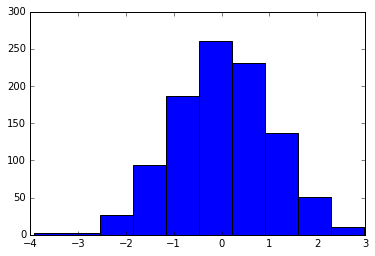

In [3]:
x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to maek it a much more visually pleasing plot:

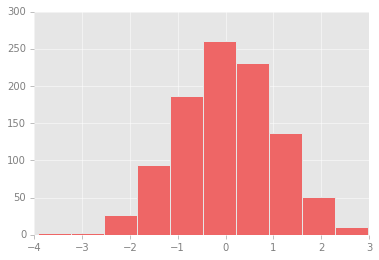

In [7]:
# use a gray background 
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels 
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')

for tick in ax.get_yticklabels():
    tick.set_color('gray')

# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

This looks better, and you may recognize the look as inspired by the look of the R language's ggplot visualization package. But this took a whole lot of effort! We definitely do not want to have to do all that tweaking each time we create a plot. Fortunately, there is a way to adjust these defaults once in a way will work for all plots.

## Changing the Defaults: `rcParams`
Each time Matplotlib loads, it defines a runtien configuration (rc) containing the defaults styles for every plot element you create. This configuration can be adjusted at any time using the `plt.rc` convenience routine. Let's see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

We'll start by saving a copy of the current `rcParams` dictionary, so we can easily reset these changes in the current session:

In [9]:
IPython_default = plt.rcParams.copy()

Now we can use the `plt.rc` function to change some of these settings:

In [15]:
from matplotlib import cycler 
colors = cycler('color',
               ['#EE6666', '#3388BB', '#9988DD',
                '#EECC55', '#88BB44', '#FFBBBB'])

plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',                
       axisbelow=True, grid=True, prop_cycle=colors)

plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defiend, we can now create a plot and see our settings in action:

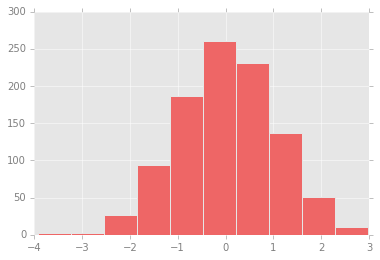

In [16]:
plt.hist(x);

Let's see what simple line plots look like with these rc parameters:

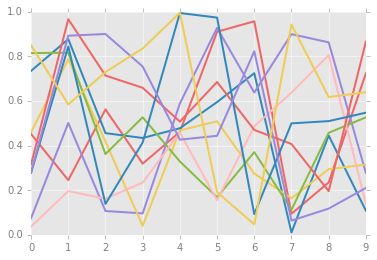

In [18]:
for i in range(10):
    plt.plot(np.random.rand(10))

I find this much more aesthetically pleasing that the default styling. If you disagree with my aesthetic sense, the good news is that you can adjust the rc parameters to suit your own tastes! Theste settings can be saved in a *.matplotlibrc* file.